In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,classification_report,precision_score,recall_score,f1_score,confusion_matrix

In [166]:
df=pd.read_excel('amazon sales dataset.xlsx')
df.head()


,Order ID,Order Date,Customer ID,Customer Name,Region,Product Category,Product Name,Quantity Sold,Unit Price,Discount (%),Salesperson,Payment Method,Order Status,Total Sales,Profit Margin
0,576ca8db-ad1a-4aa8-9c3a-89102555f200,2019-01-01,48aa940a-5cb5-4103-8d89-19c10fd26aaf,Stephanie Garcia,South America,Home & Kitchen,Speak,9,484.46,21.33,Johnny Marshall,Debit Card,Returned,3430.12,1193.53
1,b7154d7e-f369-4a81-80b1-d36b23cc0420,2019-01-01,8de3545c-78e6-4962-ace5-02e37fe1ce91,Jacob Morales,South America,Books,If,10,179.28,6.43,Bradley Howe,Gift Card,Pending,1677.52,583.70
2,b2852522-fbaa-43fa-b165-bd10e0035591,2019-01-02,6ac41f61-acf6-4e46-8b70-ad00ce01c9d0,John Carroll,North America,Sports,Big,6,185.34,1.57,Johnny Marshall,Amazon Pay,Completed,1094.58,380.86
3,f14eae78-235f-4283-a2cc-6433fd861c14,2019-01-04,04bb6a6a-a62a-4e79-a038-68758f215ccc,Allison Ramirez,Asia,Home & Kitchen,Serious,5,40.98,4.21,Roger Brown,PayPal,Completed,196.27,68.29
4,c3fcb6f0-a399-47eb-8903-2a354425ea75,2019-01-04,2267ce03-37ba-446a-b279-17ecee550c6e,James Thompson,North America,Toys,Operation,10,459.39,20.50,Kristen Ramos,PayPal,Cancelled,3652.15,1270.78


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          5000 non-null   object        
 1   Order Date        5000 non-null   datetime64[ns]
 2   Customer ID       5000 non-null   object        
 3   Customer Name     5000 non-null   object        
 4   Region            5000 non-null   object        
 5   Product Category  5000 non-null   object        
 6   Product Name      4999 non-null   object        
 7   Quantity Sold     5000 non-null   int64         
 8   Unit Price        5000 non-null   float64       
 9   Discount (%)      5000 non-null   float64       
 10  Salesperson       5000 non-null   object        
 11  Payment Method    5000 non-null   object        
 12  Order Status      5000 non-null   object        
 13  Total Sales       5000 non-null   float64       
 14  Profit Margin     5000 n

In [168]:
df.describe()

,Order Date,Quantity Sold,Unit Price,Discount (%),Total Sales,Profit Margin
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2022-01-02 09:26:12.480000,5.518800,255.161728,14.899920,1187.145384,413.072520
min,2019-01-01 00:00:00,1.000000,5.160000,0.000000,4.610000,1.600000
25%,2020-07-03 00:00:00,3.000000,130.112500,7.237500,370.127500,128.787500
50%,2022-01-08 00:00:00,6.000000,257.080000,14.870000,907.955000,315.930000
75%,2023-06-21 06:00:00,8.000000,379.710000,22.442500,1762.252500,613.180000
max,2024-12-31 00:00:00,10.000000,499.910000,29.990000,4911.920000,1709.120000
std,NaN,2.896088,143.167691,8.705621,988.464586,343.940683


In [169]:
df.isnull().sum()

,0
Order ID,0
Order Date,0
Customer ID,0
Customer Name,0
Region,0
Product Category,0
Product Name,1
Quantity Sold,0
Unit Price,0
Discount (%),0


In [170]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Order ID,0
Order Date,0
Customer ID,0
Customer Name,0
Region,0
Product Category,0
Product Name,0
Quantity Sold,0
Unit Price,0
Discount (%),0


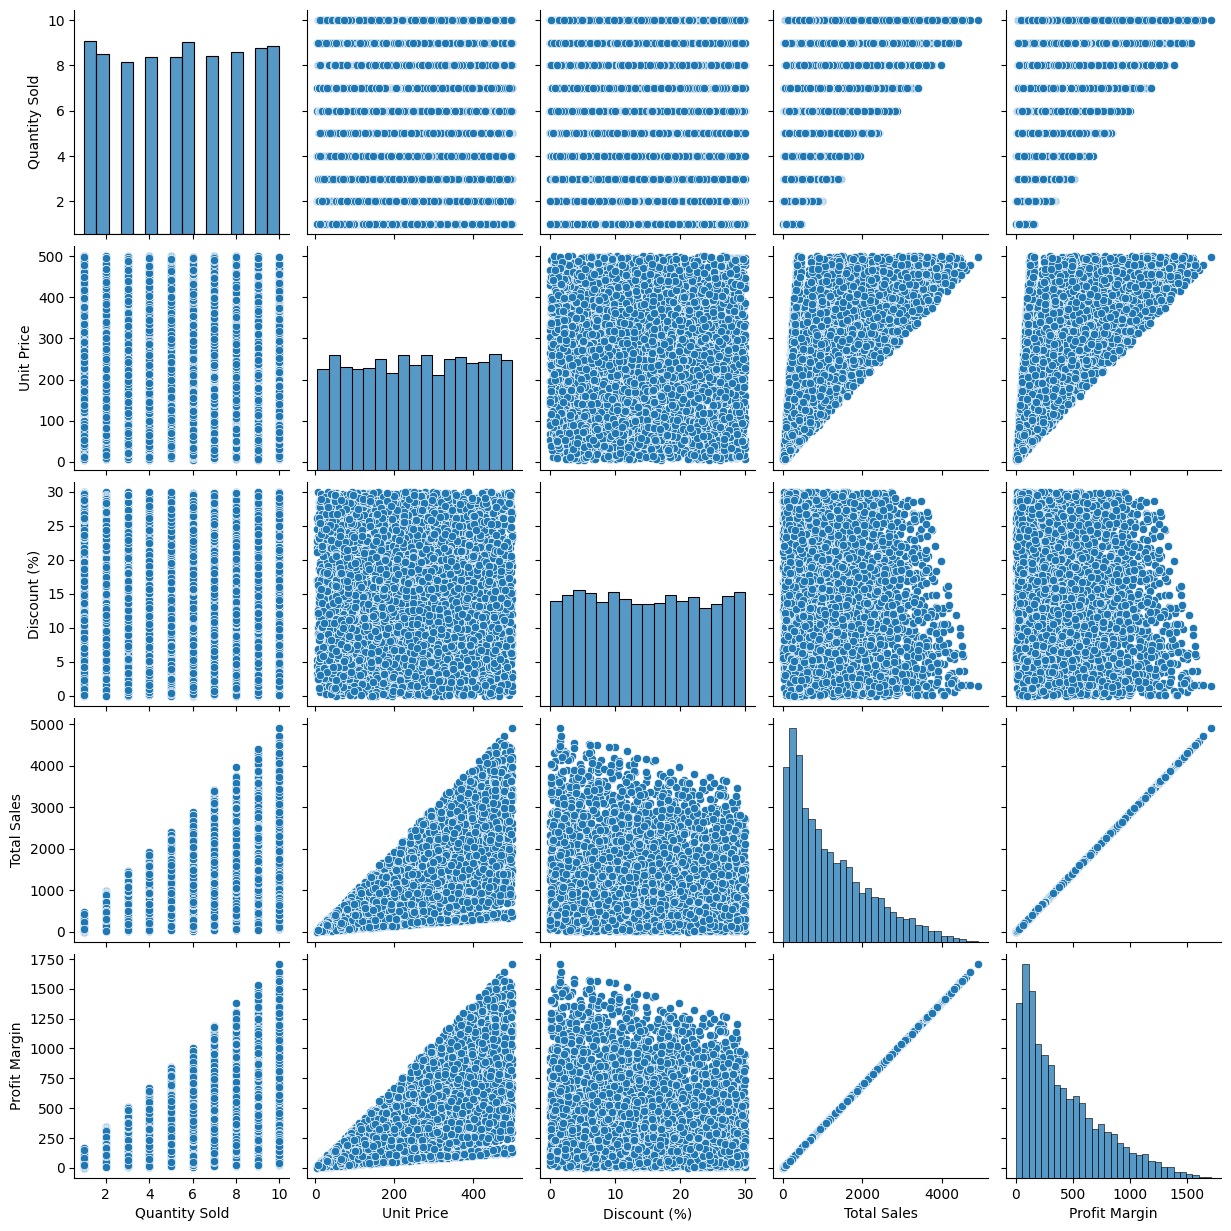

In [171]:
sns.pairplot(df,vars=['Quantity Sold','Unit Price','Discount (%)','Total Sales','Profit Margin'])
plt.show()

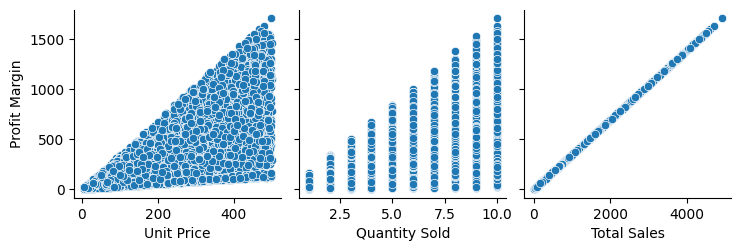

In [172]:
sns.pairplot(df,x_vars=['Unit Price','Quantity Sold','Total Sales'],y_vars='Profit Margin')
plt.show()

In [173]:
X=df[['Unit Price','Quantity Sold','Total Sales']]
y=df['Profit Margin']

In [174]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [175]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [176]:
y_pred=model.predict(X_test)

In [177]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean squared error : {mse}")
print(f"R^2 score :  {r2}")


Mean squared error : 8.363510689380491e-06
R^2 score :  0.9999999999287025


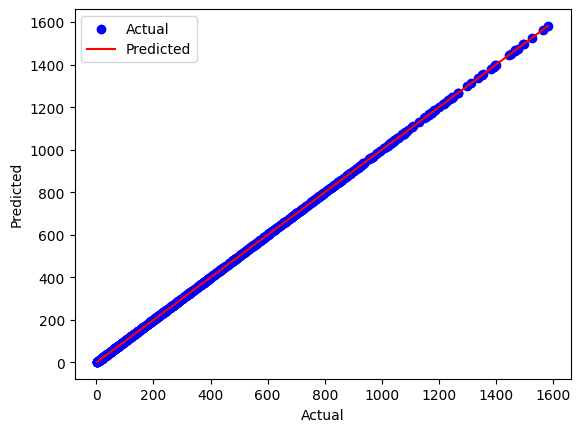

In [178]:
plt.scatter(y_test,y_pred,color='blue',label='Actual')
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='red',label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [179]:
df['Profit_Label'] = df['Profit Margin'].apply(lambda x: 1 if x > 700 else 0)
df.head()

,Order ID,Order Date,Customer ID,Customer Name,Region,Product Category,Product Name,Quantity Sold,Unit Price,Discount (%),Salesperson,Payment Method,Order Status,Total Sales,Profit Margin,Profit_Label
0,576ca8db-ad1a-4aa8-9c3a-89102555f200,2019-01-01,48aa940a-5cb5-4103-8d89-19c10fd26aaf,Stephanie Garcia,South America,Home & Kitchen,Speak,9,484.46,21.33,Johnny Marshall,Debit Card,Returned,3430.12,1193.53,1
1,b7154d7e-f369-4a81-80b1-d36b23cc0420,2019-01-01,8de3545c-78e6-4962-ace5-02e37fe1ce91,Jacob Morales,South America,Books,If,10,179.28,6.43,Bradley Howe,Gift Card,Pending,1677.52,583.70,0
2,b2852522-fbaa-43fa-b165-bd10e0035591,2019-01-02,6ac41f61-acf6-4e46-8b70-ad00ce01c9d0,John Carroll,North America,Sports,Big,6,185.34,1.57,Johnny Marshall,Amazon Pay,Completed,1094.58,380.86,0
3,f14eae78-235f-4283-a2cc-6433fd861c14,2019-01-04,04bb6a6a-a62a-4e79-a038-68758f215ccc,Allison Ramirez,Asia,Home & Kitchen,Serious,5,40.98,4.21,Roger Brown,PayPal,Completed,196.27,68.29,0
4,c3fcb6f0-a399-47eb-8903-2a354425ea75,2019-01-04,2267ce03-37ba-446a-b279-17ecee550c6e,James Thompson,North America,Toys,Operation,10,459.39,20.50,Kristen Ramos,PayPal,Cancelled,3652.15,1270.78,1


In [180]:
X = df[['Quantity Sold', 'Unit Price', 'Discount (%)', 'Total Sales']]
y = df['Profit_Label']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [183]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       796
           1       1.00      0.99      1.00       204

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [184]:
cm = confusion_matrix(y_test, y_pred)
TP,TN,FP,FN=cm.ravel()
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

True Positives (TP): 796
True Negatives (TN): 0
False Positives (FP): 2
False Negatives (FN): 202


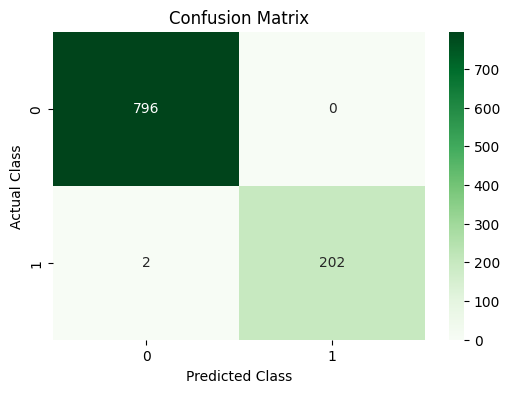

In [185]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()